{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Explore the distribution of values within a raster using histograms.
* Plot a histogram of a raster dataset in **Python** using **matplotlib**.

</div>

In the last lesson, you learned about three key attributes of a raster dataset:

1. Spatial resolution
2. Spatial extent and
3. Coordinate reference systems

In this lesson, you will learn how to use histograms to better understand the
distribution of your data.


## Open Raster Data in Python

To work with raster data in **Python**, you can use the **rasterio** and **numpy** packages.
Remember you can use the **rasterio context manager** to import the raster object into **Python**.

In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rioxarray as rxr
import earthpy as et

# Get data and set wd
et.data.get_data("colorado-flood")

os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In this lesson, you will learn how to explore the data values in a raster dataset 
using histogram plots. As you did in the previous lessons, you can begin by opening your raster data using `rxr.open_rasterio()`.

In [2]:
# Define relative path to file
lidar_dem_path = os.path.join("colorado-flood", 
                              "spatial",
                              "boulder-leehill-rd", 
                              "pre-flood", 
                              "lidar",
                              "pre_DTM.tif")

# Open data 
lidar_dem_im = rxr.open_rasterio(lidar_dem_path)

# View object dimensions
lidar_dem_im.shape

(1, 2000, 4000)


## Raster Histograms - Distribution of Elevation Values


The histogram below represents the distribution of pixel elevation values in your
data. This plot is useful to:

1. Identify outlier data values
2. Assess the min and max values in your data
3. Explore the general distribution of elevation values in the data - i.e. is the area generally flat, hilly, is it high elevation or low elevation.

It's often good practice to view histograms of your data
before beginning to work with it as a data exploration step. 
Histograms will tell you a lot about the distribution of values in your data.
They will also sometimes help you identify issues associated with processing your data.

To begin, look at the shape of the histogram below which represents pixel
values for your lidar DEM data. Notice that there is an unusual skew to your data. 
Often times when you see a skew like this with many values on one side of the plot, 
it means that there are outlier data values in your data OR missing data values that 
you need to deal with.

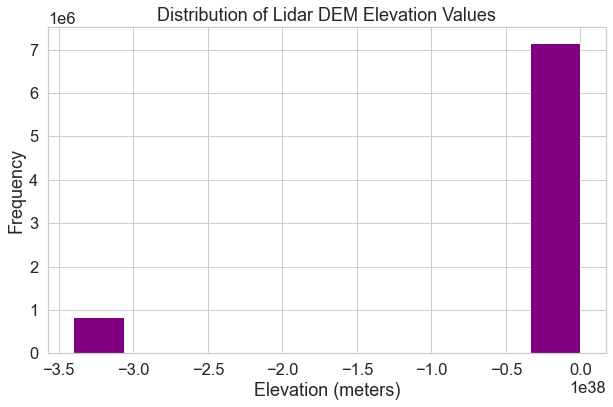

In [3]:
# Plot a histogram
f, ax = plt.subplots(figsize=(10, 6))
lidar_dem_im.plot.hist(ax=ax,
       color="purple")
ax.set(title="Distribution of Lidar DEM Elevation Values",
       xlabel='Elevation (meters)',
       ylabel='Frequency')
plt.show()



## What Does a Histogram Tell You?

A histogram shows us how the data are distributed. Each bin or bar in the plot
represents the number or frequency of pixels that fall within the range specified
by the bin.

You can use the `bins=` argument to specify fewer or more breaks in your histogram.
Note that this argument does not result in the exact number of breaks that you may
want in your histogram.

Below, you open up the data again but specify `masked=True` which will mask
any fill or nodata values. Notice the difference in your resulting histogram.

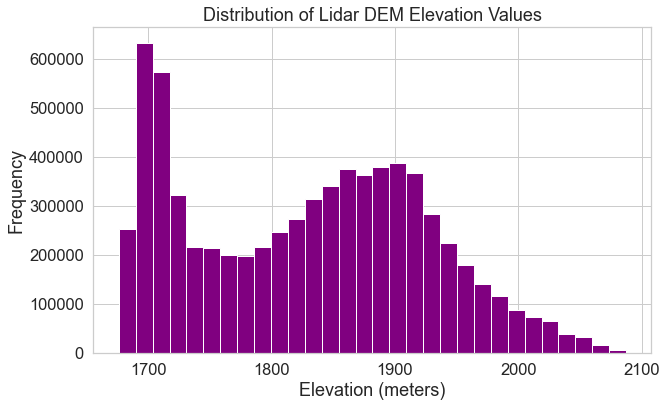

In [4]:
# Open data 
lidar_dem_im = rxr.open_rasterio(lidar_dem_path, masked=True)

# Plot a histogram
f, ax = plt.subplots(figsize=(10, 6))
lidar_dem_im.plot.hist(ax=ax,
                       color="purple",
                       bins=30)
ax.set(title="Distribution of Lidar DEM Elevation Values",
       xlabel='Elevation (meters)',
       ylabel='Frequency')
plt.show()

### Customize Your Hstogram

Alternatively, you can specify specific break points that you want **Python** to use when it
bins the data. Specifying custom break points can be a good way to begin to look
for patterns in the data. In the next chapter, you will use this approach to identify
visual break points that might make sense to use when manually classifying your data.

`bins=[1600, 1800, 2000, 2100]`

In this case, **Python** will count the number of pixels that occur within each value range
as follows:

* bin 1: number of pixels with values between 1600-1800
* bin 2: number of pixels with values between 1800-2000
* bin 3: number of pixels with values between 2000-2100


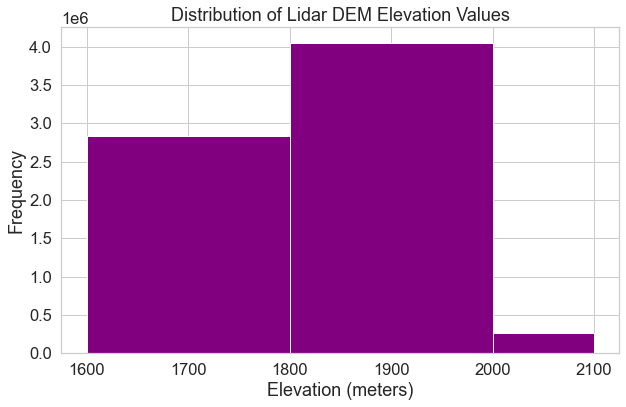

In [5]:
f, ax = plt.subplots(figsize=(10, 6))
lidar_dem_im.plot.hist(ax=ax,
                       color="purple",
                       bins=[1600, 1800, 2000, 2100])
ax.set(title="Distribution of Lidar DEM Elevation Values",
       xlabel='Elevation (meters)',
       ylabel='Frequency')
plt.show()

Histograms are powerful data exploration tools to use when working with 
raster data. In the following lessons of this chapter, you will learn more 
about the geotiff file format that you have been working with so far. You
will also learn more about spatial raster metadata as it applies to processing
raster data.